In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">ch10. N차원 배열 다루기</font>
- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 C언어로 구현되어 고성능 수치 계산 패키지
# 1절 Numpy 패키지

In [9]:
import numpy as np
np.__version__

'1.23.5'

In [10]:
# np.arange(from, stop, step) : from 부터 stop 앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)

## 1.1 배열 속성

In [34]:
from numpy import arange
a = arange(15).reshape(3, 5) # 3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [35]:
type(a) # a변수의 타입
type(a.dtype) # a배열 요소의 type

numpy.dtype[int32]

In [36]:
a.dtype.name

'int32'

In [37]:
a.itemsize # 한 요소의 bytesize

4

In [38]:
a.ndim #차원수 축수

2

In [39]:
a.size # 배열 요소의 개수

15

In [40]:
a.shape # 배열의 구조 (튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [41]:
# 구조 변경
print('구조변경 전', a, sep='\n')
a.shape = (5, 3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [54]:
# 타입 변경(X)
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [55]:
a.dtype

dtype('int32')

In [56]:
a.itemsize

4

In [58]:
a.size

12

In [59]:
a.shape

(3, 4)

In [61]:
a.dtype = np.int64 # a배열을 읽을 때 64bit씩 읽는다
a.dtype

dtype('int64')

In [62]:
a.itemsize

8

In [63]:
a.size

6

In [64]:
a.shape

(3, 2)

In [65]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [92]:
# 타입변경(O)
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [104]:
a = a.astype(np.int64) # 할당하지 않으면 a 변경 X

In [105]:
a.astype('int64')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [106]:
a.dtype

dtype('int64')

In [107]:
a.itemsize

8

In [108]:
a.size, a.shape

(12, (3, 4))

In [109]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [110]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [111]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [112]:
a.size, a.shape

(12, (3, 4))

## 1.3 배열 저장

In [113]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [115]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f :
    pickle.dump(a, f)


In [116]:
with open('data/ch10_a.pkl', 'rb') as f :
    load_a = pickle.load(f)

In [123]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [121]:
np.all(a == load_a) # a numpy 배열과 load_a numpy 배열 같은지

True

In [124]:
np.save('data/ch10_a.npy', a)

In [ ]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2==a)

# 2절. numpy 배열
- array()함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들...
## 2.1 array() 함수로 numpy 배열 만들기
- array(리스트나 튜플, dtype=np.xxx, copy=T/F)

In [144]:
a = np.array(['2', 4, 6], dtype=np.int8) # 정수의 기본 타입은 int 32 / 실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [145]:
a[0], a[1], a[2]

(2, 4, 6)

In [146]:
a.dtype

dtype('int8')

In [148]:
b = np.array([[1.3,2.4], 
          [4,5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [149]:
b.dtype

dtype('float64')

In [152]:
b = np.array([[1.3,2.4],[4,5]], dtype=np.float32).reshape(1, 4)

In [153]:
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [154]:
b.itemsize

4

In [155]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [157]:
l = [[1,2], [3.4, 4.5]]
for row in l :
    for data in row :
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [161]:
c = np.array([[1,2], [3.4, 4.5]], dtype=np.float64)  # float16 보다 float 64가 정확하다.
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}열:{}".format(i,j,item), end='\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.4	1행1열:4.5	


In [178]:
c = np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [180]:
c[1,]

array([ 6,  7,  8,  9, 10], dtype=int16)

In [181]:
print(c[:, 1:3]) # 모든행, 1열부터 3열 앞까지
print(c[0:1, 2::]) # 0행 2~4열까지

[[2 3]
 [7 8]]
[[3 4 5]]


In [192]:
# 모든행의 맨 마지막 열만 추출
c[:, -1::]

array([[ 5],
       [10]], dtype=int16)

In [194]:
# 모든행의 맨 마지막 열을 제외한 추출
c[:,:-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [198]:
c = np.array([[1,2], [3,4]])
d = np.array(c, copy=False) # c=d 얕은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소 ={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]


In [199]:
c = np.array([[1,2], [3,4]])
d = np.array(c, copy=True) # d=c.copy() 깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소 ={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소 =2881505804336, d주소:2881505815568


## 2.2 기본값이 있는 배열 만들기
- np.zeors( tup ) : 요소들이 다 0
- np.ones( tup ) : 요소들이 다 1
- np.full( tup ) : 요소들이 다 기본값
- np.empty(tup) : 기본값이 임의의 값(메모리 상태에 따라 달라짐)
※ 위의 함수를 이용한 배열의 dtype = float64. dtype 속성따라 지정가능

In [201]:
np.zeros( (3, 5), dtype=np.int8)

array([[1., 1., 1., 1., 1.]])

In [202]:
x = np.ones((3, 5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [203]:
np.full( (2,5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

## 2.3 랜덤값을 갖는 배열 만들기
import numpy as np
- np.random.random(tup) : 0부터 1 미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균 loc과 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생(난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1인 정규분포)의 1차원 난수 배열 발생 (난수 n개)

*np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

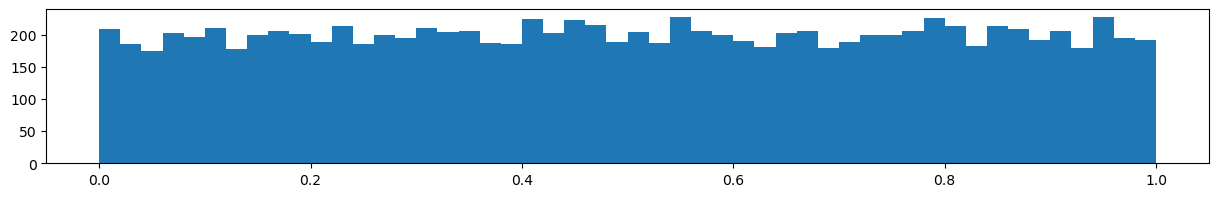

In [211]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

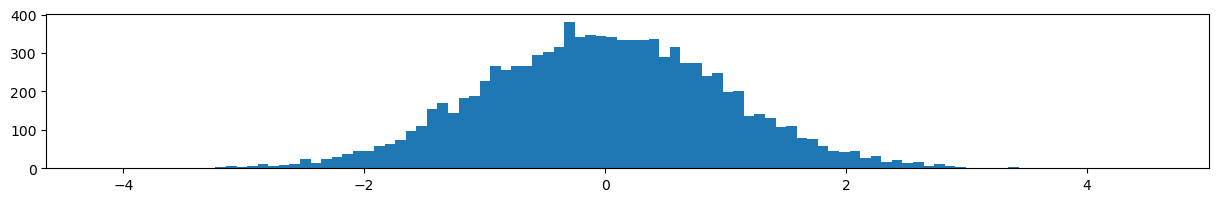

In [212]:
x = np.random.randn(10000)
plt.figure(figsize=(15, 2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=100)
plt.show()

In [213]:
# 2차원 난수 배열
np.random.seed(12) # seed 값을 맞추면 발생되는 난수 순서가 동일
np.random.random( (2, 5) ) # 0부터 1미만 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [215]:
np.random.uniform(-1, 10, (2, 5)) # -1~10 미만의 균등분포 난수 배열

array([[ 5.66691503,  9.3864765 ,  8.38009095, -0.97514843,  4.7334863 ],
       [ 5.07241397,  4.33915155,  7.44947569,  0.76788428,  7.41016495]])

In [ ]:
np.random.normal(10, 2, (2, 5)) # 평균 10, 표준편차 2인 정규분포 난수 배열

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from부터 stop 앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from 부터 to 까지(to포함) count개 숫자를 1차원 배열

In [223]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [236]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

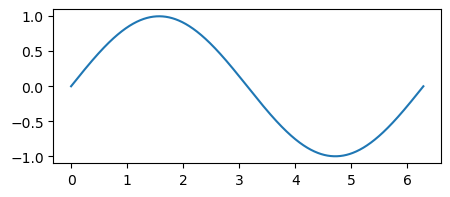

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 2))
plt.plot(x,y)
plt.show()

In [238]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [239]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수], 행수, 열수) : -1이 올 수 있다.
- resize([면수], 행수, 열수) : -1 불가
- T : 전치 행렬로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [240]:
a = np.random.random( (2, 3))
a

array([[0.0208098 , 0.13521018, 0.11627302],
       [0.30989758, 0.67145265, 0.47122978]])

In [244]:
a = np.round(a * 10) # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[0., 1., 1.],
       [3., 7., 5.]])

In [246]:
a.reshape(3, 2)
a

array([[0., 1., 1.],
       [3., 7., 5.]])

In [252]:
a.reshape(-1, 3) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[0., 1., 1.],
       [3., 7., 5.]])

In [253]:
a.resize( (2,3) ) # 결과 출력하지 않는 함수는 배열 자체를 바꿈. -1 불가
a

array([[0., 1., 1.],
       [3., 7., 5.]])